# Statistical Pattern Recognition - Solution 3: K-means and EM

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy import stats
plt.rc('font', size=16)


## Utility functions

In [9]:
def plot_gaussian(ax, mean, cov, color='red', size=3):
    # draws ellipses representing different standard deviations (size is the number of ellipses)
    # width and height are times by 2 since sqrt of the eigenval only measures half the distance
    eig_w, eig_v = np.linalg.eig(cov)
    # eigenvectors are orthogonal so we only need to check the first one
    eig_v_0 = eig_v[0]
    # arccos of first eigenvectors x coordinate will give us the angle
    angle = np.arccos(eig_v_0[0])
    # however, this only works for angles in [0, pi]
    # for angles in [pi, 2*pi] we need to consider the
    # y coordinate, too
    if eig_v_0[1] > 0:
        angle = 2 * np.pi - angle
    angle = np.rad2deg(angle)

    for i in range(size):
        ell = Ellipse(xy=[mean[0], mean[1]],
                      width=np.sqrt(eig_w[0]) * 2 * (i + 1),
                      height=np.sqrt(eig_w[1]) * 2 * (i + 1),
                      angle=angle,
                      edgecolor=color, lw=2, facecolor='none')
        ax.add_artist(ell)
    print(mean)
    ax.plot(mean[0], mean[1], "x", c=color, ms=20)



## $\star$ Part 1: K-means and EM with sklearn

Run the Sklearn implementations of k-means and expectation maximization on the dataset *gaussianplus.npz*.


Plot the estimated assignments and the estimated
parameters of the two Gaussians. 

Describe how the fitting by expectation maximization outperforms the one with k-means.

Try with varying, also
very bad initializations. How stable are the results?


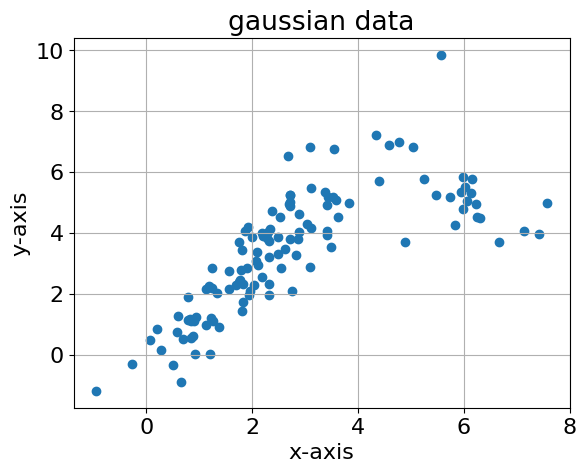

In [10]:
# Load and visualize the dataset (as in previous exercises):

# START TODO #################
data = np.load("../data/gaussianplus.npz")
data = data[data.files[0]]
x = data[:,0]
y = data[:,1]
plt.scatter(x, y,  marker='o')
plt.title("gaussian data")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.show()
# END TODO #################


### Part 1.1: Run K-Means


[[1.57166965 2.14473835]
 [4.47527286 5.20701391]]


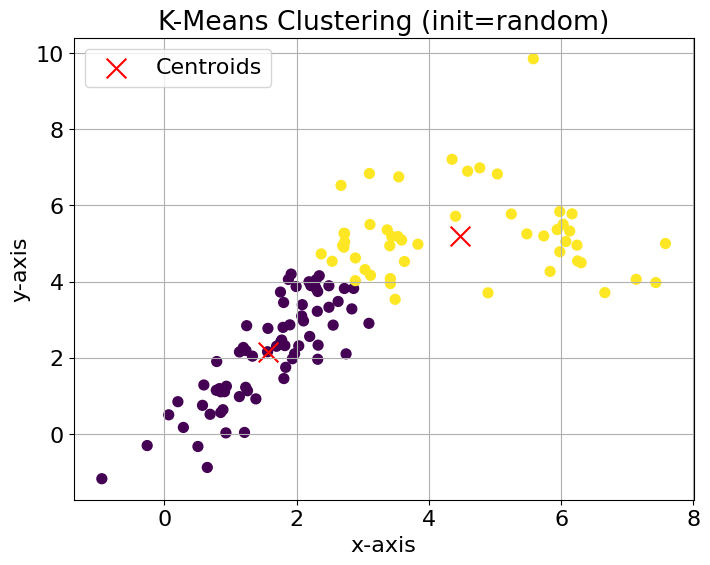

In [11]:
def run_and_plot_k_means(data, init='random', k=2):
    """
    Runs the K-means algorithm from sklearn on the input data and plots the results.

    Args:
        data: Input data.
        init: Initialization method (see the sklearn documentation).
        k : Number of clusters.
    """

    # Apply the K-Means clustering implementation from sklearn (see documentation for usage instructions).
    # Store the cluster assignments in a variable called 'labels' and the cluster centroids in a
    # variable called 'centroids':
    # START TODO #################
   
    kmeans = KMeans(n_clusters=k, init = init, random_state=0, n_init = "auto").fit(data)
    # END TODO #################

    # Print centroids:
    # START TODO #################
   
    print(kmeans.cluster_centers_)
    # END TODO #################

    # Plot results (plot datapoints and centroids; color points according to the cluster assignment):
    # START TODO #################
    fig, ax = plt.subplots(figsize=(8, 6))
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', s=50)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    ax.set_title(f"K-Means Clustering (init={init})")
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.grid(True)
    ax.legend()
    plt.show()

    # END TODO #################


# run with random init:
run_and_plot_k_means(data, init='random')


[[1.38663598 1.75281102]
 [4.04352806 4.92971669]]


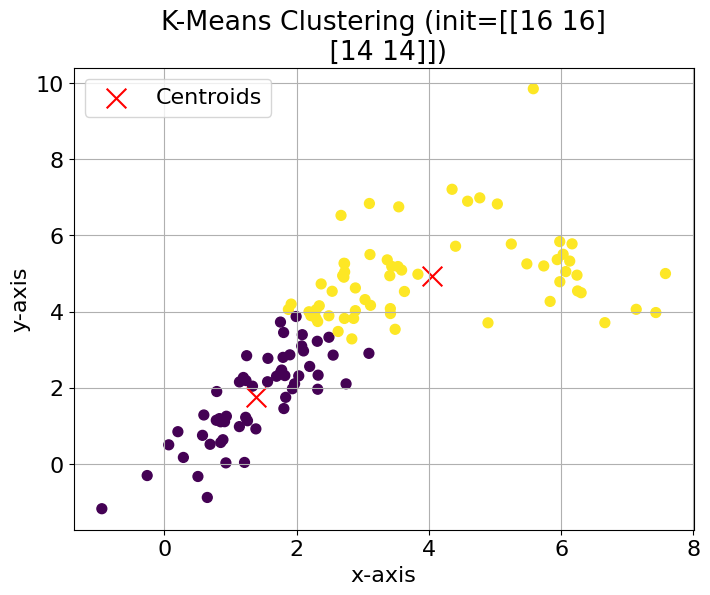

In [12]:
# run with manual init:
run_and_plot_k_means(data, init=np.array([[16,16], [14,14]]))


### Part 1.2: Run EM algorithm


Means:
 [[6.114629   4.9264463 ]
 [2.12908102 3.12595021]]
Weights:
 [0.16369726 0.83630274]
Covariances:
 [[[ 0.48480184 -0.18706344]
  [-0.18706344  0.52613454]]

 [[ 1.34041989  2.07634314]
  [ 2.07634314  3.96473625]]]
[6.114629  4.9264463]
[2.12908102 3.12595021]


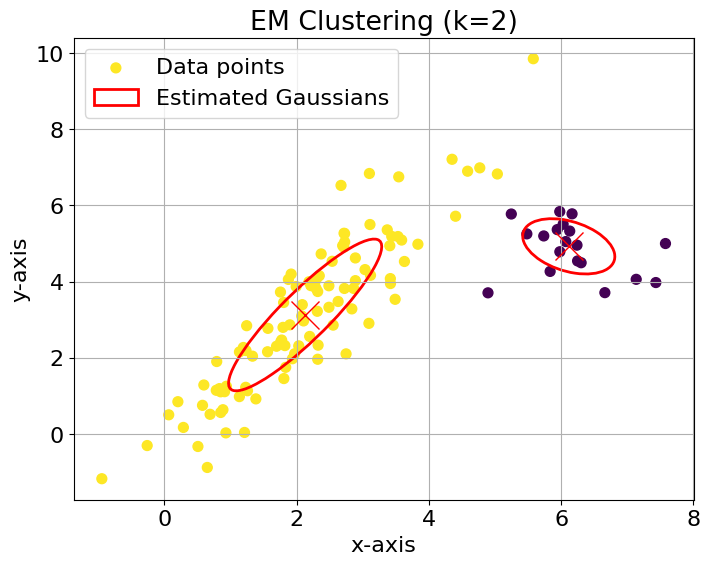

In [13]:
def run_and_plot_em(data, means_init=None, k=2):
    """
    Runs the EM algorithm from sklearn on the input data and plots the results.

    Args:
        data: Input data.
        means_init: Initial means of the gaussians.
        k: Number of mixture components.
    """
    # Apply the EM-algorithm implementation from sklearn (see documentation for usage instructions).
    # Store the cluster assignments in a variable called 'labels', the estimated means in a variable 'means',
    # the estimated weights in a variable 'weights' and the estimated covariances in a variable 'covariances':
    # START TODO #################
    gmm = GaussianMixture(n_components=k,  init_params='random', means_init=means_init).fit(data)
    labels = gmm.predict(data)
    means = gmm.means_
    weights = gmm.weights_
    covariances = gmm.covariances_
    # END TODO #################

    # Print means and mixture weights:
    # START TODO #################
    print("Means:\n", means)
    print("Weights:\n", weights)
    print("Covariances:\n", covariances)
    # END TODO #################

    # Plot results:
    # (plot datapoints and centroids; color points according to the cluster assignment;
    # plot covariances with the plot_gaussian function)
    # START TODO #################
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', s=50)
    ax.set_title(f"EM Clustering (k={k})")
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.grid(True)
    for i in range(k):
        plot_gaussian(ax, means[i], covariances[i], color='red', size=1)
    
    ax.legend(['Data points', 'Estimated Gaussians'])
    plt.show()
    # END TODO #################


# run with random init:
run_and_plot_em(data)


Means:
 [[6.18800092 7.75177458]
 [2.78149099 3.42066955]]
Weights:
 [3.91319475e-06 9.99996087e-01]
Covariances:
 [[[ 0.68119155 -2.26005231]
  [-2.26005231  7.77512418]]

 [[ 3.3749309   2.68818409]
  [ 2.68818409  3.84555982]]]
[6.18800092 7.75177458]
[2.78149099 3.42066955]


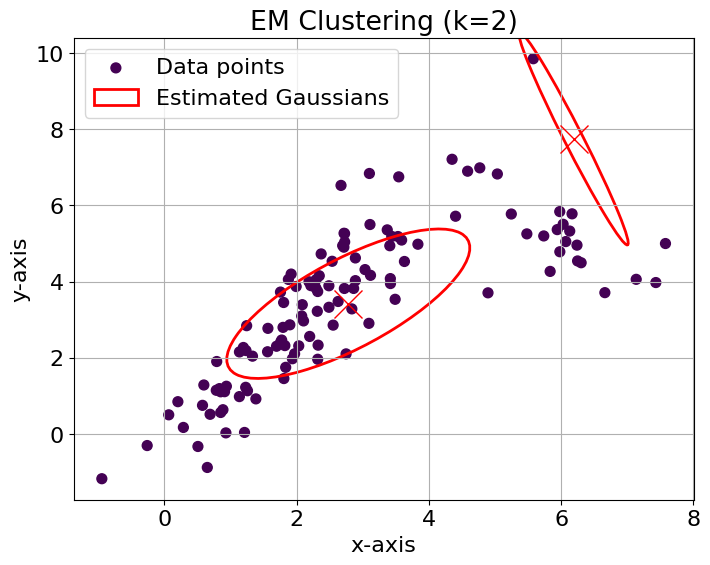

(120, 2)


In [14]:
# run with manual init:
run_and_plot_em(data, means_init=np.array([[16,16], [10,10]]))
print(np.shape(data))


# $\star\star\star$ Part 2: Custom k-means and EM

Build your own implementations of k-means and EM to learn in
detail how these important algorithms work.

Compare your implementation with the sklearn
implementation.


### Part 2.1: Custom K-means implementation


In [16]:
class SimpleKMeans:
    def __init__(self, k, mean_init, num_iters=100):
        """Custom k-means implementation.

        Args:
            k: Number of clusters.
            mean_init: Initial cluster means as np array of shape (num_clusters, dimensions).
            num_iters: Number of iterations.
        """
        self.centroids = mean_init.astype(float)
        self.labels = None
        self.num_iters = num_iters
        self.k = k

    def fit(self, data):
        # run k-means on the data and store results in self.centroids and self.labels:
        # START TODO #################
        dimension = data.shape[1]
        for _ in range(self.num_iters):
           
            distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)
            for i in range(self.k):
                if np.any(self.labels == i):
                    self.centroids[i] = data[self.labels == i].mean(axis=0)
                    
        # END TODO #################


Centroids:
 [[4.47527286 5.20701391]
 [1.57166965 2.14473835]]


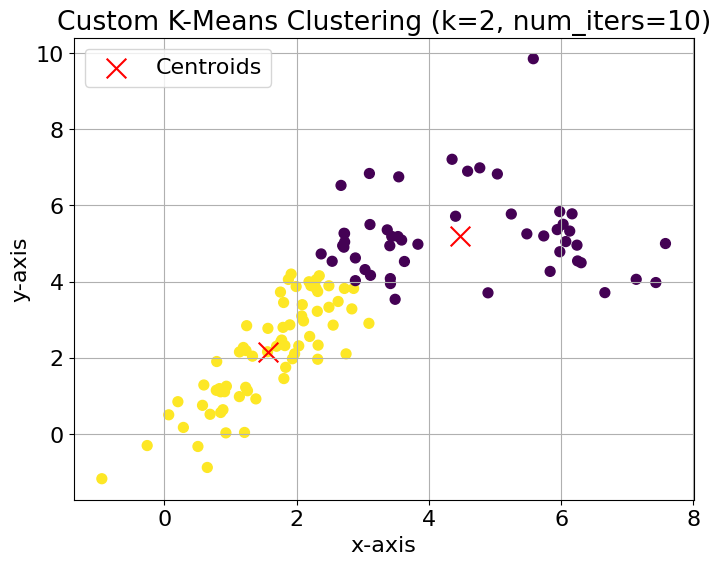

[[4.47527286 5.20701391]
 [1.57166965 2.14473835]]


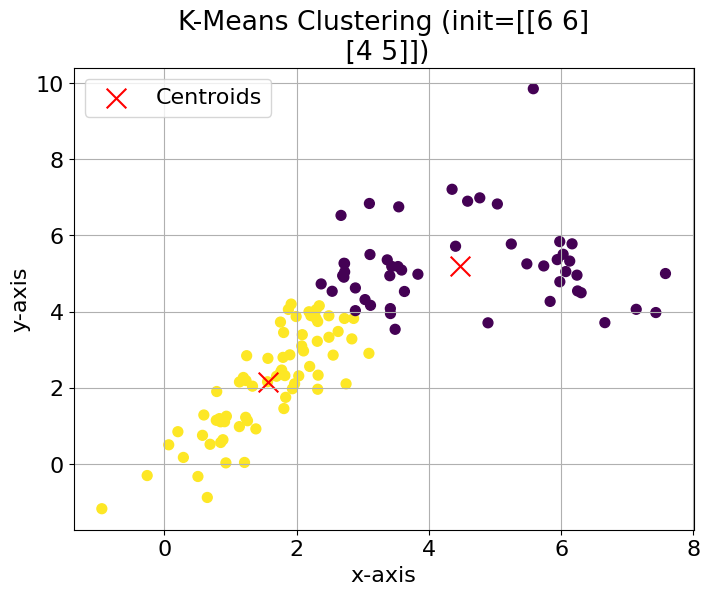

In [17]:
def run_and_plot_simple_k_means(data, init=np.array([[4,4], [10,4]]), k=2, num_iters=10):
    """Runs the custom K-means implementation on the input data and plots the results.

    Args:
        data: Input data.
        init: Initial cluster centroids.
        k : Number of clusters.
        num_iters : Number of iterations.
    """
    # Apply the custom K-Means clustering implementation.
    # Store the cluster assignments in a variable called 'labels' and the cluster centroids in a
    # variable called 'centroids':
    # START TODO #################
    model = SimpleKMeans(k=k, mean_init=init, num_iters=num_iters)
    model.fit(data)
    labels = model.labels
    centroids = model.centroids
    # END TODO #################

    # Print centroids:
    # START TODO #################
    print("Centroids:\n", centroids)
    # END TODO #################

    # Plot results (plot datapoints and centroids; color points according to the cluster assignment):
    # START TODO #################
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', s=50)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    ax.set_title(f"Custom K-Means Clustering (k={k}, num_iters={num_iters})")
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.grid(True)
    ax.legend()
    plt.show()
    # END TODO #################


# Run our implementation of simple k-means:
run_and_plot_simple_k_means(data, init=np.array([[6,6], [4,5] ]), k=2, num_iters=10)


# Compare to the sklearn implementation of k-means:
run_and_plot_k_means(data, init=np.array([[6,6], [4,5]]))


### Part 2.2: Custom EM algorithm implementation


In [20]:
class SimpleEM:
    def __init__(self, means_init=None, k=2, num_iters=10):
        # initialize attributes:
        # START TODO #################
        self.k = k
        self.num_iters = num_iters
        self.means = means_init if means_init is not None else np.random.rand(k, 2)
        self.pi = np.ones(self.k)/self.k
        self.dim = self.means.shape[1]
        self.sigmas = np.array([np.identity(self.dim) for i in range(self.k)])
        self.gamma = None

        # END TODO #################

    # START TODO #################
    def e_step(self, x):
        self.gamma = np.zeros((x.shape[0], self.k))
        for i in range(self.k):
            self.gamma[:, i] = self.pi[i] * stats.multivariate_normal.pdf(x, mean=self.means[i], cov=self.sigmas[i])
        self.gamma /= np.sum(self.gamma, axis=1, keepdims=True)
        self.gamma = np.nan_to_num(self.gamma)
        return self.gamma

    def m_step(self, x): 
        N_k = np.sum(self.gamma, axis=0)
        self.pi = N_k / x.shape[0]
        for i in range(self.k):
            self.means[i] = np.sum(self.gamma[:, i][:, np.newaxis] * x, axis=0) / N_k[i]
            diff = x - self.means[i]
            self.sigmas[i] = np.dot((self.gamma[:, i][:, np.newaxis] * diff).T, diff) / N_k[i]
        self.sigmas = np.nan_to_num(self.sigmas)
        return self.means, self.sigmas, self.pi
    # END TODO #################

    def fit(self, data):
        # run the em algorithm on the data and store results self.means, self.sigmas, self.pi, self.labels:
        # START TODO #################
        for _ in range(self.num_iters):
            self.e_step(data)
            self.m_step(data)
        self.labels = np.argmax(self.gamma, axis=1) 
        # END TODO #################


Means:
 [[2.13257433 3.1305364 ]
 [6.12403458 4.91520127]]
Weights:
 [0.8374204 0.1625796]
Covariances:
 [[[ 1.34790472  2.08569726]
  [ 2.08569726  3.97557219]]

 [[ 0.47443655 -0.17356697]
  [-0.17356697  0.50921966]]]
[2.13257433 3.1305364 ]
[6.12403458 4.91520127]


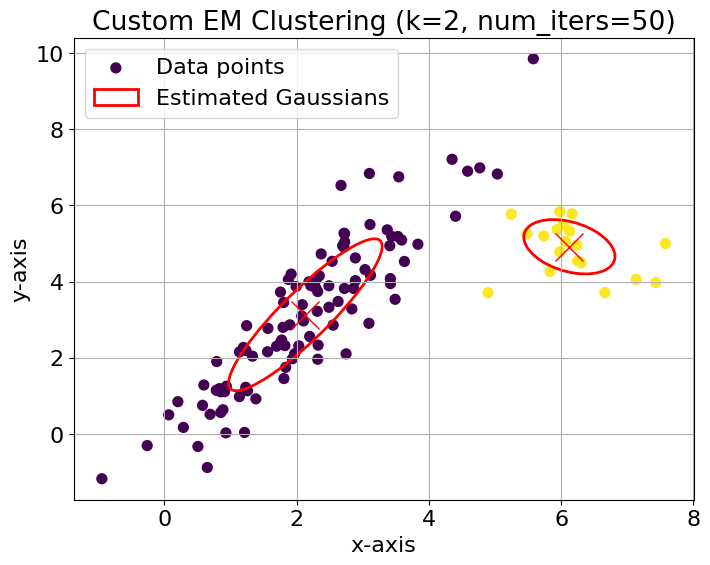

Means:
 [[6.09772105 4.94831973]
 [2.12251992 3.11712176]]
Weights:
 [0.16577385 0.83422615]
Covariances:
 [[[ 0.50250748 -0.21304033]
  [-0.21304033  0.56003473]]

 [[ 1.32617287  2.05801809]
  [ 2.05801809  3.94266459]]]
[6.09772105 4.94831973]
[2.12251992 3.11712176]


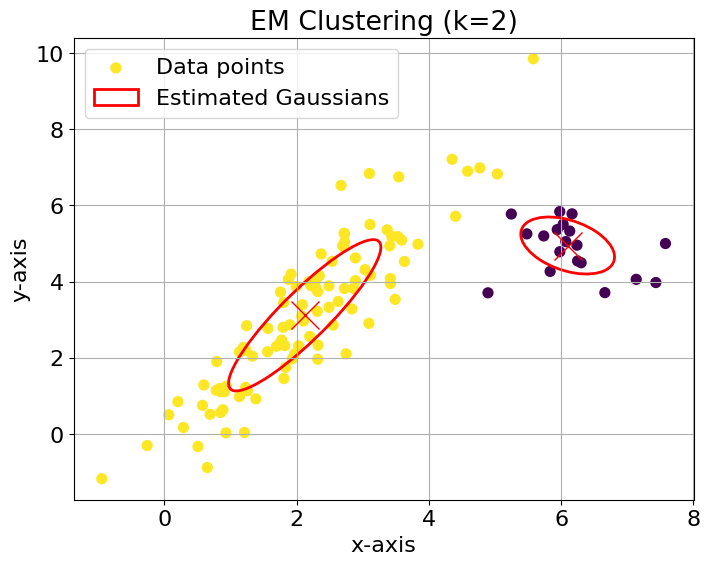

In [21]:
def run_and_plot_simple_em(data, means_init=None, k=2, num_iters=10):
    """
    Runs the custom EM algorithm implementation on the input data and plots the results.

    Args:
        data: Input data.
        means_init: Initial means of the gaussians.
        k: Number of mixture components.
        num_iters: Number of iterations.
    """
    # Apply the custom EM-algorithm implementation.
    # Store the cluster assignments in a variable called 'labels', the estimated means in a variable 'means',
    # the estimated weights in a variable 'weights' and the estimated covariances in a variable 'covariances':
    # START TODO #################
    model = SimpleEM(means_init=means_init, k=k, num_iters=num_iters)
    model.fit(data)
    labels = model.labels
    means = model.means 
    # END TODO #################

    # Print means and mixture weights:
    # START TODO #################
    print("Means:\n", means)    
    print("Weights:\n", model.pi)
    print("Covariances:\n", model.sigmas)
    # END TODO #################

    # Plot results:
    # (plot datapoints and centroids; color points according to the cluster assignment;
    # plot covariances with the plot_gaussian function)
    # START TODO #################
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', s=50)
    ax.set_title(f"Custom EM Clustering (k={k}, num_iters={num_iters})")
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.grid(True)
    for i in range(k):
        plot_gaussian(ax, means[i], model.sigmas[i], color='red', size=1)
    ax.legend(['Data points', 'Estimated Gaussians'])
    plt.show()
    # END TODO #################

# Run our implementation of the EM algorithm:
run_and_plot_simple_em(data, k=2, num_iters=50)


# Compare to the sklearn implementation of the EM algorithm:
run_and_plot_em(data)
